In [3]:
import pandas as pd
import numpy as np


from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy.stats import t


In [64]:
dfs = pd.read_csv('/Users/dus/Desktop/Python/marketing_pilot_proc.csv')

In [65]:
dfs = pd.read_csv('/Users/dus/Desktop/Python/late_collection_clients.csv')

In [66]:
dfs

,id_client,id_global,id_city,gender,married,first_time,age,is_educ,cellphone,is_active,cl_segm,amt_loan,date_loan,credit_type
0,2756,1791.0,15.0,M,False,1.0,82.0,0.0,NaN,0.0,2.0,90000,2021-05-01,TOP-UP
1,2101,3978.0,1.0,F,False,1.0,84.0,0.0,8.916453e+10,0.0,2.0,500000,2020-02-05,POS-1
2,684,3409.0,2.0,M,False,1.0,84.0,1.0,8.916521e+10,1.0,2.0,440000,2021-04-23,POS-1
3,1330,1880.0,2.0,M,False,1.0,44.0,0.0,8.985401e+10,1.0,2.0,440000,2021-04-30,CC
4,734,3494.0,2.0,M,False,1.0,84.0,1.0,8.916150e+10,1.0,2.0,200000,2019-07-13,POS-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,822,2541.0,4.0,M,False,NaN,NaN,NaN,NaN,NaN,NaN,500000,2018-09-07,POS-1
2993,1068,2465.0,5.0,M,False,1.0,NaN,NaN,NaN,NaN,NaN,440000,2020-05-17,POS-1
2994,2232,2466.0,2.0,M,False,1.0,NaN,NaN,NaN,NaN,NaN,440000,2019-03-31,POS-1
2995,1167,2845.0,18.0,F,False,1.0,49.0,0.0,8.985093e+10,1.0,2.0,30000,2018-07-09,POS-1


In [67]:
r1s = dfs[dfs['gender']=='M']['amt_loan']
r0s = dfs[dfs['gender']=='F']['amt_loan']

In [68]:
x1_avg = r1s.mean()#np.mean(r1s\)
x1_var = r1s.var() #np.var(r1s)
x1_stddev = np.std(r1s) #st deviation of series
q1 = r1s.quantile([0.25,0.5,0.75])

In [69]:
x1_avg

433715.9214830971

In [70]:
x1_var

185918249315.38104

In [71]:
x1_stddev

431064.8167319519

In [72]:
q1

0.25    100000.0
0.50    250000.0
0.75    650000.0
Name: amt_loan, dtype: float64

In [73]:
#### CDF - Cumulative Distribution Function
#### PPF - Обратная функция накопительного распределния
#### PDF -Probability Density Function

In [74]:
norm.ppf(0.975) #уровень квантиля - квантиль

1.959963984540054

In [75]:
norm.cdf(1.959963984540054) #квантиль - уровень квантиля


0.975

In [76]:
norm.pdf(0.975)

0.24801872461073715

In [77]:
norm.cdf(0.975)

0.8352198700196897

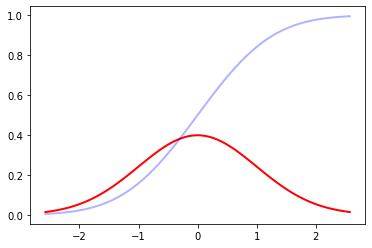

In [78]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)

x = np.linspace(norm.ppf(0.005),
                norm.ppf(0.995), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw = 2, alpha=1 #, label='norm pdf'
       )
ax.plot(x, norm.cdf(x),
       'b-', lw = 2, alpha=0.3 #, label='norm cdf'
       )

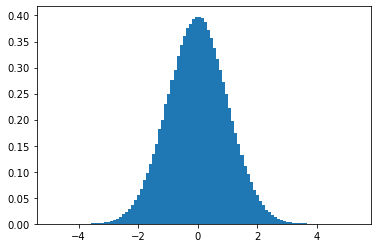

In [79]:
student = np.random.standard_t(10000,size=1000000)
h = plt.hist(student, bins=100 ,density = True #вместо частот частости
            )


In [80]:
len(student)

1000000

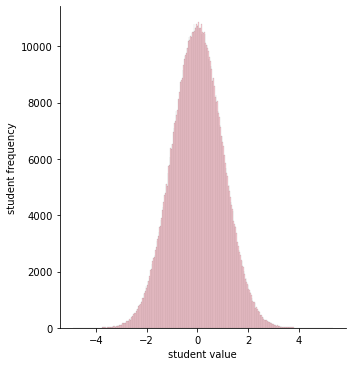

In [81]:
import seaborn

ax = seaborn.displot(student,
                    color = 'pink',
                    )
ax.set(xlabel = 'student value', ylabel = 'student frequency' )

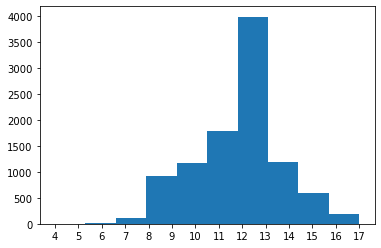

In [82]:
from scipy.stats import binom

data = binom.rvs(n = 17, p = 0.7, loc = 0, size = 10000)
plt.hist(data)
plt.xticks(np.unique(data)); #; чтобы показать только гистограмму без доп инфы

In [83]:
type(data)

numpy.ndarray

In [84]:
len(data)

10000

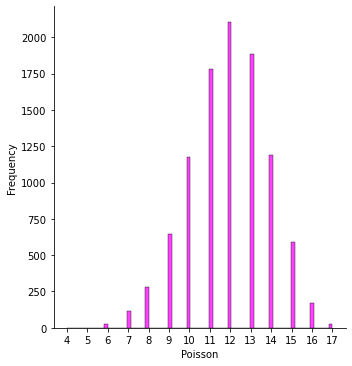

In [85]:
ax = seaborn.displot(data, 
                    color = 'Magenta'
                    )
ax.set(xlabel = 'Poisson', ylabel = 'Frequency')
plt.xticks(np.unique(data));

In [86]:
data.mean()

11.8876

In [87]:
17*0.7

11.899999999999999

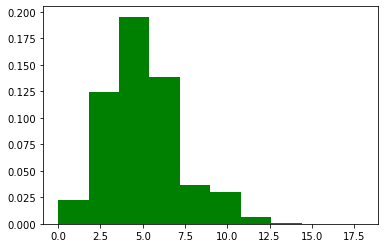

In [88]:
s = np.random.poisson(5,1000000)
plt.hist(s
         , color = 'Green'
         , density = True
        );



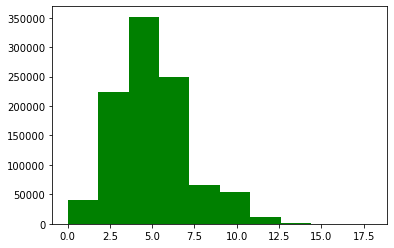

In [89]:
plt.hist(s
         , color = 'Green'
         #, density = True
        );



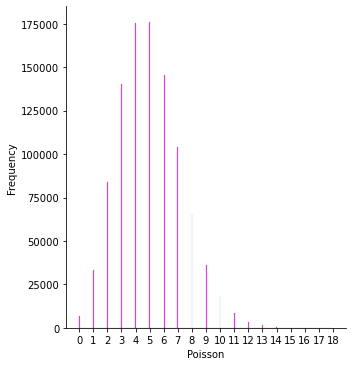

In [90]:
ax = seaborn.displot(s, 
                    color = 'magenta'
                    )
ax.set(xlabel = 'Poisson', ylabel = 'Frequency')
plt.xticks(np.unique(s));

In [93]:
a, b = ttest_ind(r1s, r0s)

In [95]:
def check_two_samples(r1, r2, alpha = 0.05):
    ttest, pval = ttest_ind(r1,r2)
    
    if pval > alpha:
        print("Гипотеза H0 принимается")
    else:
        print("Гипотеза H0 отвергается")

In [96]:
check_two_samples(r1s,r0s, alpha = 0.05)

Гипотеза H0 принимается
